#Lab Assignment - 2
**2022-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 07-10-2022   2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, upload a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TA:

Armaan Garg, 2019csz0002@iitrpr.ac.in	

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab2.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab2 then you should name the colab file as: ABC_2022csx1234_lab2.ipynb


**This assignment will focus on the implementation of TD learning methods viz. the Q-learning and SARSA Algorithms on selected OpenAI Gym environments.**

**Template code is provided for reference/help and is optional to use**

# CartPole-v0 environment

https://gym.openai.com/envs/CartPole-v0/


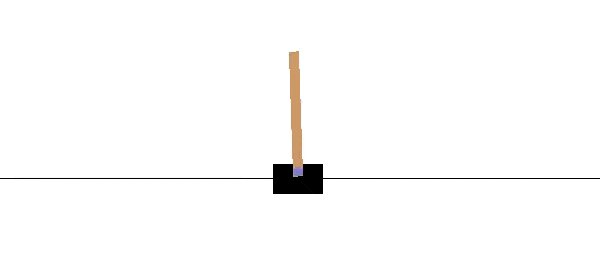




**Description**:
   

>  A pole is attached by an un-actuated joint to a cart, which moves along
    a frictionless track. The pendulum starts upright, and the goal is to
    prevent it from falling over by increasing and reducing the cart's
    velocity.



**Observation**:
 *   Num     Observation               Min                     Max
 *   0       Cart Position             -4.8                    4.8
 *   1       Cart Velocity             -Inf                    Inf
 *   2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
 *   3       Pole Angular Velocity     -Inf                    Inf




**Actions**:
   * Type: Discrete(2)
   * Num /  Action
   * 0  /   Push cart to the left
   * 1  /   Push cart to the right

    Note: The amount the velocity that is reduced or increased is not
    fixed; it depends on the angle the pole is pointing. This is because
    the center of gravity of the pole increases the amount of energy needed
    to move the cart underneath it

**Reward**:
    Reward is 1 for every step taken, including the termination step

**Starting State**:
    All observations are assigned a uniform random value in [-0.05..0.05]

**Episode Termination**:
  * Pole Angle is more than 12 degrees
    
  * Cart Position is more than 2.4 (center of the cart reaches the edge of
    the display).

  *  Episode length is greater than 200.

**Success Requirements**: Considered solved when the average return is greater than or equal to 195.0 over 100 consecutive trials.
    
    

# Template code for running CartPole-v0
reference: https://www.codeproject.com/Articles/5271939/Cartpole-The-Hello-World-of-Reinforcement-Learning

In [ ]:
# install xvfb, a virtual X server
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyvirtualdisplay
_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

In [ ]:
!pip install gym==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gym
env = gym.make("CartPole-v0")

In [ ]:
from gym.wrappers import Monitor

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.make("CartPole-v0"))

In [ ]:
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
# Test Environment and Show Videos
observation = env.reset()
while True:
    env.render()
    action = 1
    observation, reward, done, info = env.step(action)         
    if done: 
      break;
env.close()
show_video()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Policy which takes arbitrary, equally likely action decisions

In [ ]:
env = wrap_env(gym.make("CartPole-v0"))
observation = env.reset()
np.random.seed(10)
episode_length = 0
while True:
    episode_length += 1
    env.render()
    if np.random.uniform(0, 1) > 0.5 :
        action = 0
    else:
        action = 1     
    observation, reward, done, info = env.step(action)
    if done:
        break;
print(f"Episode Length = {episode_length}")        
env.close()
show_video()
    

Episode Length = 28


# CartPole Questions
Q1. Implement a Q-learning agent using a purely random behavior policy for the following learning rates $\alpha$ = [0.0001,0.001,0.01,0.05,0.1]. Observe whether the agent fulfills the success requirements (mentioned above) in each case. What is the effect of $\alpha$ on Q-learning? Demonstrate using plots. Plot the learning curve of the policies learnt in each case using  episode vs. avg reward/episode  **(20 points)**

# Note on Modifications to Reward:
- The reward function has been **reinforced to give high positive reward (constant 200)if terminal episode length exceeds 195, and linear negative reward (-(300 - episode length)) if it doesn't**
- This helps in faster convergence, but also the updates may vary largely, making us miss the optima, when reward is too high or too low
- To tackle this, I observe lower $\alpha$ value performs better, and hence use that as optimal  $\alpha$


# Note on Methodology 
- First I take some discrete points for each attribute of the state, i.e.
    - Cart Position
    - Cart velocity    
    - Pole Angle
    - Pole Angular Velocity
- These points are then used as centres of radial basis feature descriptors 
- If, say, we have 10 points of each attribute, then I will have total of 1e4 feature descriptors
- These are then used to model the Q value function as their linear combination
- But as I have used radial basis, **this linear combination is not linear in the original state space**

In [ ]:
class radialBasisFeature():
    """
    For a given state value (here, a 4-tuple) this class creates an object
    which assigns a sigma value (fow far the region of influence) of a state goes
    and a state center, the 4-tuple for the cart-pole Environment
    For each object a method self.val is associated which calculates
    the feature value corresponding to the state (center) for a state space point (a 4-tuple)
    using the radial basis formula
    Metric was used as a parameter to decide p value in L_p norm , but only for 2 has been implemented
    as it seemed to give better performance
    """
    def __init__(self, sigma, state, metric):
        self.sigma = sigma
        self.state = state        
        self.metric = metric
    def val(self, s):
        return np.exp(- np.sqrt(np.sum((s - self.state)**2))/(2 * self.sigma**2))

In [ ]:
def qLearning(env, alpha = 0.001, epsilon = 0.1, num_episodes = 200, seed = 1, gamma = 0.9,
              slice_size = 10, variance = 0.1, decay = -1, metric = 2,  ratios = (1, 1, 1, 1)):
    """
    Each model of environment has many hyper paramters
    alpha, epsilon, num_episodes, seed, gamma are as usual
    slice_size tells how finely i have discretized by cts space
    ratios multiply slice size by the constant, as parameter like pole velocity which 
    is in a larger domain, may need more slices than others
    """
    print("Training...")
    cart_pos = np.linspace(-2.39, 2.39, int(ratios[0] * slice_size))
    cart_vel = np.linspace(-2, 2, int(ratios[1] * slice_size))
    pole_angle = np.linspace(-0.209, 0.209, int(ratios[2] * slice_size))
    pole_vel = np.linspace(-3, 3, int(ratios[3] * slice_size))
    if decay == -1: # -1 for no decay
        eps = np.full(num_episodes, epsilon)
    elif decay == 0 or decay == 1: # 0 or 1 for uniform decay
        eps = np.linspace(1, 0.01, num_episodes)     
    feat_centres = []
    for i1 in range(slice_size):
        for i2 in range(slice_size):
            for i3 in range(slice_size):
                for i4 in range(slice_size):
                    feat_centres.append([cart_pos[i1], cart_vel[i2], pole_angle[i3], pole_vel[i4]])    
    feat_vector = [radialBasisFeature(variance, feat_centres[i], metric=metric) for i in range(len(feat_centres))]        
    w0 = np.random.uniform(-0.1, 0.1, (len(feat_vector), 1)) + 0.01
    w1 = np.random.uniform(-0.1, 0.1, (len(feat_vector), 1)) + 0.01                
    np.random.seed(seed)
    episode_lengths = []
    for _ in range(num_episodes):     
        env = wrap_env(gym.make("CartPole-v0"))   
        episode_length = 0
        done = False        
        start_state = env.reset()
        while not done:
            env.render()
            episode_length += 1
            feat_array_start = np.array([[feat_vector[i].val(start_state) for i in range(len(feat_vector))]]).T 
            q0 = w0.T @ feat_array_start
            q1 = w1.T @ feat_array_start
            coin = np.random.uniform(0, 1) # for formulating stochasticity
            action = None
            if (coin <= (1 - eps[_])):    # here we exploit
                if q0 >= q1:
                    action = 0
                else:
                    action = 1
            else:
                action = np.random.choice([0, 1])   # else we explore                                      
            next_state, reward, done, info = env.step(action)            
            feat_array_next = np.array([[feat_vector[i].val(next_state) for i in range(len(feat_vector))]]).T
            qnext0 = 0
            qnext1 = 0
            if not done:
                qnext0 = w0.T @ feat_array_next
                qnext1 = w1.T @ feat_array_next
            if done and episode_length < 193:
                reward -=  (300- episode_length)
            elif episode_length >= 194:
                reward += 200
            if action == 0:
                qi = w0.T @ feat_array_start
                w0 += alpha * (reward + gamma * max(qnext0, qnext1) - qi) * qi
            else:
                qi = w1.T @ feat_array_start
                w1 += alpha * (reward + gamma * max(qnext0, qnext1) - qi) * qi                                
            start_state = next_state
        episode_lengths.append(episode_length)
        print(f"Episode Number: #{_ + 1}, Episode Length {episode_length}, epsilon {eps[_]}")
        env.close()
        if episode_length >= 100 or _ + 1 == num_episodes:
            show_video()                
    return feat_vector, w0, w1, episode_lengths

In [ ]:
def get_avg_return(env, feat_vector, w0, w1, num_episodes = 100):
    print("Testing")
    returns = 0    
    for _ in range(num_episodes):     
        env = wrap_env(gym.make("CartPole-v0"))              
        observation = env.reset() 
        episode_len = 0
        while True:
            env.render()
            episode_len += 1
            feat_array = np.array([[feat_vector[i].val(observation) for i in range(len(feat_vector))]]).T 
            q0 = w0.T @ feat_array
            q1 = w1.T @ feat_array
            action = None
            if q0 >= q1:
                action = 1
            else:
                action = 0
            observation, reward, done, info = env.step(action)
            if done:
                break
        print(f"Episode Number: #{_ + 1}, Episode Length {episode_len}")
        env.close()
        if episode_len >= 100 or _ + 1 == num_episodes:
            show_video()
        returns += episode_len        
    return returns/num_episodes                

In [ ]:
alphas = [0.1, 0.05, 0.01, 0.001, 0.0001]
epsilon = 1
num_episodes = 50
test_episodes = 20
seed = 1
gamma = 0.99
slice_size = 10
variance = 0.1
decay = -1
metric = 2
ratios = (1, 1, 1, 1)

In [ ]:
fixed_epsilon_test_results = dict({})
fixed_epsilon_train_results = dict({})

# Note to see results
- The **videos have been rendered in the output of below cell where training and testing has been done**. 
- Whenever episode length exceeds 100 or it is the last training/testing episode, the video has been rendered, kindly scroll within the cell, to see the videos
- Plots corresponding to **learning curves** on training episodes have also been plotted

Training...
Episode Number: #1, Episode Length 17, epsilon 1
Episode Number: #2, Episode Length 16, epsilon 1
Episode Number: #3, Episode Length 26, epsilon 1
Episode Number: #4, Episode Length 15, epsilon 1
Episode Number: #5, Episode Length 18, epsilon 1
Episode Number: #6, Episode Length 18, epsilon 1
Episode Number: #7, Episode Length 44, epsilon 1
Episode Number: #8, Episode Length 21, epsilon 1
Episode Number: #9, Episode Length 16, epsilon 1
Episode Number: #10, Episode Length 19, epsilon 1
Episode Number: #11, Episode Length 8, epsilon 1
Episode Number: #12, Episode Length 15, epsilon 1
Episode Number: #13, Episode Length 15, epsilon 1
Episode Number: #14, Episode Length 26, epsilon 1
Episode Number: #15, Episode Length 15, epsilon 1
Episode Number: #16, Episode Length 27, epsilon 1
Episode Number: #17, Episode Length 15, epsilon 1
Episode Number: #18, Episode Length 17, epsilon 1
Episode Number: #19, Episode Length 27, epsilon 1
Episode Number: #20, Episode Length 16, epsilon 

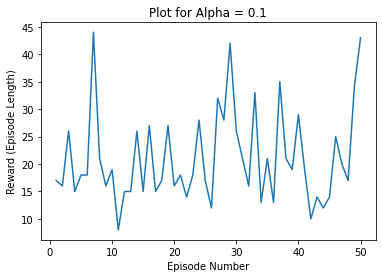

finding avg Returns...
Testing
Episode Number: #1, Episode Length 28
Episode Number: #2, Episode Length 9
Episode Number: #3, Episode Length 8
Episode Number: #4, Episode Length 11
Episode Number: #5, Episode Length 9
Episode Number: #6, Episode Length 26
Episode Number: #7, Episode Length 16
Episode Number: #8, Episode Length 51
Episode Number: #9, Episode Length 60
Episode Number: #10, Episode Length 15
Episode Number: #11, Episode Length 9
Episode Number: #12, Episode Length 9
Episode Number: #13, Episode Length 12
Episode Number: #14, Episode Length 32
Episode Number: #15, Episode Length 13
Episode Number: #16, Episode Length 76
Episode Number: #17, Episode Length 12
Episode Number: #18, Episode Length 13
Episode Number: #19, Episode Length 43
Episode Number: #20, Episode Length 61


Avg Return = 25.65
Training...
Episode Number: #1, Episode Length 20, epsilon 1
Episode Number: #2, Episode Length 11, epsilon 1
Episode Number: #3, Episode Length 17, epsilon 1
Episode Number: #4, Episode Length 14, epsilon 1
Episode Number: #5, Episode Length 16, epsilon 1
Episode Number: #6, Episode Length 12, epsilon 1
Episode Number: #7, Episode Length 21, epsilon 1
Episode Number: #8, Episode Length 40, epsilon 1
Episode Number: #9, Episode Length 14, epsilon 1
Episode Number: #10, Episode Length 22, epsilon 1
Episode Number: #11, Episode Length 18, epsilon 1
Episode Number: #12, Episode Length 18, epsilon 1
Episode Number: #13, Episode Length 40, epsilon 1
Episode Number: #14, Episode Length 16, epsilon 1
Episode Number: #15, Episode Length 15, epsilon 1
Episode Number: #16, Episode Length 26, epsilon 1
Episode Number: #17, Episode Length 19, epsilon 1
Episode Number: #18, Episode Length 45, epsilon 1
Episode Number: #19, Episode Length 32, epsilon 1
Episode Number: #20, Episode

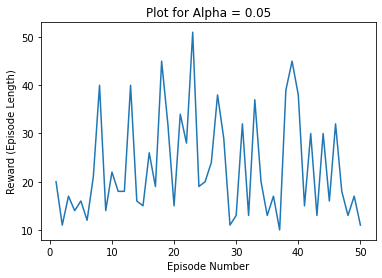

finding avg Returns...
Testing
Episode Number: #1, Episode Length 10
Episode Number: #2, Episode Length 10
Episode Number: #3, Episode Length 9
Episode Number: #4, Episode Length 25
Episode Number: #5, Episode Length 9
Episode Number: #6, Episode Length 9
Episode Number: #7, Episode Length 9
Episode Number: #8, Episode Length 17
Episode Number: #9, Episode Length 9
Episode Number: #10, Episode Length 10
Episode Number: #11, Episode Length 12
Episode Number: #12, Episode Length 21
Episode Number: #13, Episode Length 9
Episode Number: #14, Episode Length 10
Episode Number: #15, Episode Length 8
Episode Number: #16, Episode Length 18
Episode Number: #17, Episode Length 16
Episode Number: #18, Episode Length 10
Episode Number: #19, Episode Length 10
Episode Number: #20, Episode Length 9


Avg Return = 12.0
Training...
Episode Number: #1, Episode Length 17, epsilon 1
Episode Number: #2, Episode Length 17, epsilon 1
Episode Number: #3, Episode Length 25, epsilon 1
Episode Number: #4, Episode Length 15, epsilon 1
Episode Number: #5, Episode Length 16, epsilon 1
Episode Number: #6, Episode Length 20, epsilon 1
Episode Number: #7, Episode Length 67, epsilon 1
Episode Number: #8, Episode Length 23, epsilon 1
Episode Number: #9, Episode Length 20, epsilon 1
Episode Number: #10, Episode Length 47, epsilon 1
Episode Number: #11, Episode Length 16, epsilon 1
Episode Number: #12, Episode Length 24, epsilon 1
Episode Number: #13, Episode Length 28, epsilon 1
Episode Number: #14, Episode Length 9, epsilon 1
Episode Number: #15, Episode Length 11, epsilon 1
Episode Number: #16, Episode Length 27, epsilon 1
Episode Number: #17, Episode Length 23, epsilon 1
Episode Number: #18, Episode Length 12, epsilon 1
Episode Number: #19, Episode Length 23, epsilon 1
Episode Number: #20, Episode L

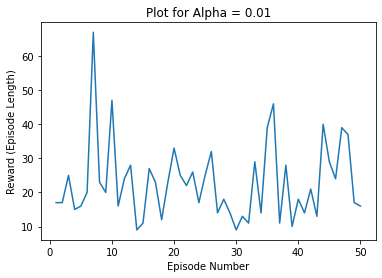

finding avg Returns...
Testing
Episode Number: #1, Episode Length 14
Episode Number: #2, Episode Length 18
Episode Number: #3, Episode Length 25
Episode Number: #4, Episode Length 18
Episode Number: #5, Episode Length 15
Episode Number: #6, Episode Length 17
Episode Number: #7, Episode Length 14
Episode Number: #8, Episode Length 25
Episode Number: #9, Episode Length 19
Episode Number: #10, Episode Length 22
Episode Number: #11, Episode Length 15
Episode Number: #12, Episode Length 14
Episode Number: #13, Episode Length 21
Episode Number: #14, Episode Length 17
Episode Number: #15, Episode Length 56
Episode Number: #16, Episode Length 47
Episode Number: #17, Episode Length 16
Episode Number: #18, Episode Length 27
Episode Number: #19, Episode Length 17
Episode Number: #20, Episode Length 22


Avg Return = 21.95
Training...
Episode Number: #1, Episode Length 17, epsilon 1
Episode Number: #2, Episode Length 17, epsilon 1
Episode Number: #3, Episode Length 24, epsilon 1
Episode Number: #4, Episode Length 13, epsilon 1
Episode Number: #5, Episode Length 16, epsilon 1
Episode Number: #6, Episode Length 20, epsilon 1
Episode Number: #7, Episode Length 27, epsilon 1
Episode Number: #8, Episode Length 19, epsilon 1
Episode Number: #9, Episode Length 14, epsilon 1
Episode Number: #10, Episode Length 12, epsilon 1
Episode Number: #11, Episode Length 19, epsilon 1
Episode Number: #12, Episode Length 12, epsilon 1
Episode Number: #13, Episode Length 9, epsilon 1
Episode Number: #14, Episode Length 15, epsilon 1
Episode Number: #15, Episode Length 12, epsilon 1
Episode Number: #16, Episode Length 44, epsilon 1
Episode Number: #17, Episode Length 19, epsilon 1
Episode Number: #18, Episode Length 19, epsilon 1
Episode Number: #19, Episode Length 50, epsilon 1
Episode Number: #20, Episode 

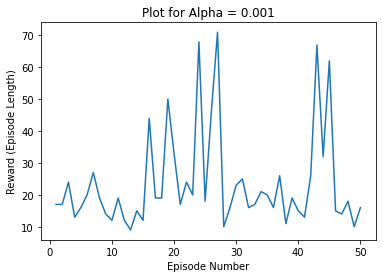

finding avg Returns...
Testing
Episode Number: #1, Episode Length 15
Episode Number: #2, Episode Length 14
Episode Number: #3, Episode Length 13
Episode Number: #4, Episode Length 10
Episode Number: #5, Episode Length 22
Episode Number: #6, Episode Length 10
Episode Number: #7, Episode Length 9
Episode Number: #8, Episode Length 9
Episode Number: #9, Episode Length 20
Episode Number: #10, Episode Length 9
Episode Number: #11, Episode Length 9
Episode Number: #12, Episode Length 17
Episode Number: #13, Episode Length 11
Episode Number: #14, Episode Length 9
Episode Number: #15, Episode Length 10
Episode Number: #16, Episode Length 11
Episode Number: #17, Episode Length 12
Episode Number: #18, Episode Length 32
Episode Number: #19, Episode Length 10
Episode Number: #20, Episode Length 9


Avg Return = 13.05
Training...
Episode Number: #1, Episode Length 20, epsilon 1
Episode Number: #2, Episode Length 12, epsilon 1
Episode Number: #3, Episode Length 16, epsilon 1
Episode Number: #4, Episode Length 13, epsilon 1
Episode Number: #5, Episode Length 11, epsilon 1
Episode Number: #6, Episode Length 12, epsilon 1
Episode Number: #7, Episode Length 16, epsilon 1
Episode Number: #8, Episode Length 69, epsilon 1
Episode Number: #9, Episode Length 17, epsilon 1
Episode Number: #10, Episode Length 18, epsilon 1
Episode Number: #11, Episode Length 83, epsilon 1
Episode Number: #12, Episode Length 28, epsilon 1
Episode Number: #13, Episode Length 15, epsilon 1
Episode Number: #14, Episode Length 26, epsilon 1
Episode Number: #15, Episode Length 16, epsilon 1
Episode Number: #16, Episode Length 14, epsilon 1
Episode Number: #17, Episode Length 16, epsilon 1
Episode Number: #18, Episode Length 16, epsilon 1
Episode Number: #19, Episode Length 14, epsilon 1
Episode Number: #20, Episode

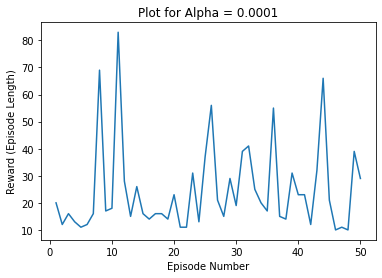

finding avg Returns...
Testing
Episode Number: #1, Episode Length 200


Episode Number: #2, Episode Length 23
Episode Number: #3, Episode Length 156


Episode Number: #4, Episode Length 75
Episode Number: #5, Episode Length 91
Episode Number: #6, Episode Length 40
Episode Number: #7, Episode Length 127


Episode Number: #8, Episode Length 82
Episode Number: #9, Episode Length 85
Episode Number: #10, Episode Length 139


Episode Number: #11, Episode Length 121


Episode Number: #12, Episode Length 27
Episode Number: #13, Episode Length 132


Episode Number: #14, Episode Length 174


Episode Number: #15, Episode Length 91
Episode Number: #16, Episode Length 32
Episode Number: #17, Episode Length 79
Episode Number: #18, Episode Length 90
Episode Number: #19, Episode Length 82
Episode Number: #20, Episode Length 29


Avg Return = 93.75


In [ ]:
for alpha in alphas:
    feat_vector, w0, w1, episode_lengths = qLearning(env, alpha = alpha, epsilon = epsilon, num_episodes = num_episodes, seed = seed, gamma = gamma, slice_size = slice_size, variance = variance, decay = decay, metric = metric,  ratios = ratios)
    fixed_epsilon_train_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)] = [feat_vector, w0, w1, episode_lengths]
    plt.title(f"Plot for Alpha = {alpha}")
    plt.plot(np.arange(1, 1 + len(episode_lengths)), episode_lengths)
    plt.xlabel("Episode Number")
    plt.ylabel("Reward (Episode Length)")
    plt.show()
    print("finding avg Returns...")                    
    fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)] = get_avg_return(env, feat_vector = feat_vector, w0 = w0, w1 = w1, num_episodes = test_episodes)
    print(f"Avg Return = {fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)]}")

In [ ]:
test_rewards_q1 = []
for alpha in alphas:
    test_rewards_q1.append(fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)])

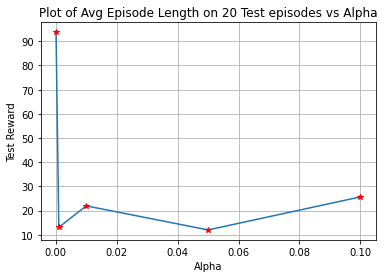

In [ ]:
plt.title(f'Plot of Avg Episode Length on {test_episodes} Test episodes vs Alpha')
plt.plot(alphas, test_rewards_q1)
plt.plot(alphas, test_rewards_q1, '*', color = 'red')
plt.xlabel('Alpha')
plt.ylabel('Test Reward')
plt.grid('on')
plt.show()

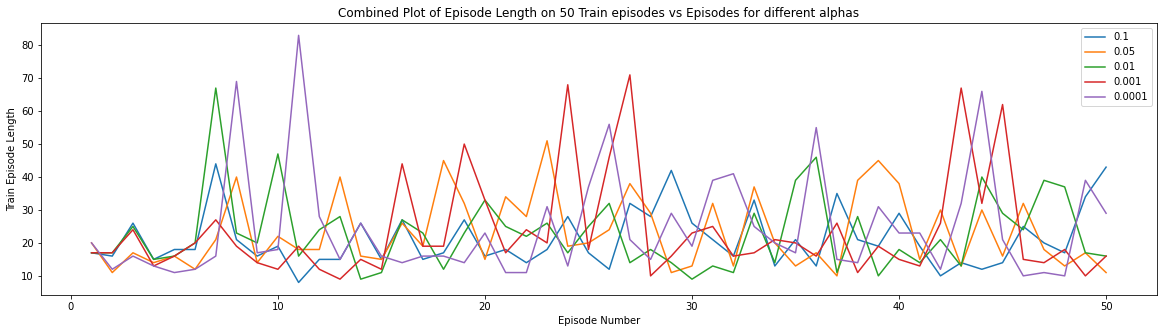

In [ ]:
plt.figure(figsize=(20,5))    
plt.title(f'Combined Plot of Episode Length on {num_episodes} Train episodes vs Episodes for different alphas')
plt.xlabel('Episode Number')
plt.ylabel('Train Episode Length')
for alpha in alphas:
    plt.plot(np.arange(1, num_episodes + 1), fixed_epsilon_train_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)][-1],label = alpha)
plt.legend()
plt.show()

# Note on Methodology Followed: 
- **All the experiments for Cartpole are done <u>without using a GPU or a neural network</u>, as there was no way I could find to make my calculations GPU compatible**
- **The experiments took long, and Colab often crashed for long runtimes, leading me to run the experiment again and again, so train episodes for random behavior policy have been limited to 50, and test to 20, and they give decent results**

## Observations:
- In cart-pole environment when using q-learning, we **don't have a stationary target**, meaning true value to approach is not known
- So, in general it seems small step size would be the way to go, as large would lead to too much change in the wrong direction, and we may keep oscillating about the optima, or even diverge
- This is what was observed, here alpha of **0.0001** gives the best average test reward of **93.75** over 20 episodes.
- The other alpha values give relatively low average reward, meaning lower $\alpha$ is better
- The situation however may change on repeated runs, due to stochastic nature of environment where some seed values are left as-is (**seed not provided**), as giving manual seed values was not resulting in good convergence
- We would need considerably larger number of episodes to get the asymptotic results, but that takes too much time.
- The max episode length of 200 was attained by the agent on test case-1 for $\alpha = 0.0001$

Q2. Implement Q-Learning using the $\epsilon$-Greedy behaviour policy with  $\alpha$ = 0.0001 and $\epsilon$ = [0.9, 0.7, 0.5, 0.3, 0.2, 0.1]. What is the effect of $\epsilon$ on the performance of Q-Learning?  Support your arguments with valuable statistics and graphs. **(20 points)** 

In [ ]:
alpha = 0.0001
epsilons = [0.9, 0.7, 0.5, 0.3, 0.2, 0.1]
num_episodes = 100
test_episodes = 20
seed = 1
gamma = 0.99
slice_size = 10
variance = 0.1
decay = -1
metric = 2
ratios = (1, 1, 1, 1)

# Note to see results
- The **videos have been rendered in the output of below cell where training and testing has been done**. 
- Whenever episode length exceeds 100 or it is the last training/testing episode, the video has been rendered, kindly scroll within the cell, to see the videos
- Plots corresponding to **learning curves** on training episodes have also been plotted

Training...
Episode Number: #1, Episode Length 20, epsilon 0.9
Episode Number: #2, Episode Length 11, epsilon 0.9
Episode Number: #3, Episode Length 10, epsilon 0.9
Episode Number: #4, Episode Length 31, epsilon 0.9
Episode Number: #5, Episode Length 15, epsilon 0.9
Episode Number: #6, Episode Length 22, epsilon 0.9
Episode Number: #7, Episode Length 27, epsilon 0.9
Episode Number: #8, Episode Length 22, epsilon 0.9
Episode Number: #9, Episode Length 19, epsilon 0.9
Episode Number: #10, Episode Length 36, epsilon 0.9
Episode Number: #11, Episode Length 26, epsilon 0.9
Episode Number: #12, Episode Length 16, epsilon 0.9
Episode Number: #13, Episode Length 20, epsilon 0.9
Episode Number: #14, Episode Length 13, epsilon 0.9
Episode Number: #15, Episode Length 20, epsilon 0.9
Episode Number: #16, Episode Length 12, epsilon 0.9
Episode Number: #17, Episode Length 12, epsilon 0.9
Episode Number: #18, Episode Length 16, epsilon 0.9
Episode Number: #19, Episode Length 22, epsilon 0.9
Episode N

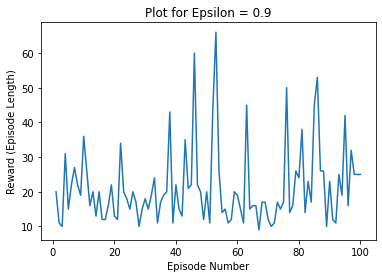

finding avg Returns...
Testing
Episode Number: #1, Episode Length 10
Episode Number: #2, Episode Length 11
Episode Number: #3, Episode Length 12
Episode Number: #4, Episode Length 11
Episode Number: #5, Episode Length 10
Episode Number: #6, Episode Length 9
Episode Number: #7, Episode Length 9
Episode Number: #8, Episode Length 11
Episode Number: #9, Episode Length 60
Episode Number: #10, Episode Length 9
Episode Number: #11, Episode Length 11
Episode Number: #12, Episode Length 21
Episode Number: #13, Episode Length 9
Episode Number: #14, Episode Length 9
Episode Number: #15, Episode Length 11
Episode Number: #16, Episode Length 9
Episode Number: #17, Episode Length 9
Episode Number: #18, Episode Length 8
Episode Number: #19, Episode Length 9
Episode Number: #20, Episode Length 12


Avg Return = 13.0
Training...
Episode Number: #1, Episode Length 26, epsilon 0.7
Episode Number: #2, Episode Length 22, epsilon 0.7
Episode Number: #3, Episode Length 45, epsilon 0.7
Episode Number: #4, Episode Length 16, epsilon 0.7
Episode Number: #5, Episode Length 15, epsilon 0.7
Episode Number: #6, Episode Length 16, epsilon 0.7
Episode Number: #7, Episode Length 13, epsilon 0.7
Episode Number: #8, Episode Length 14, epsilon 0.7
Episode Number: #9, Episode Length 13, epsilon 0.7
Episode Number: #10, Episode Length 32, epsilon 0.7
Episode Number: #11, Episode Length 21, epsilon 0.7
Episode Number: #12, Episode Length 16, epsilon 0.7
Episode Number: #13, Episode Length 19, epsilon 0.7
Episode Number: #14, Episode Length 16, epsilon 0.7
Episode Number: #15, Episode Length 18, epsilon 0.7
Episode Number: #16, Episode Length 12, epsilon 0.7
Episode Number: #17, Episode Length 17, epsilon 0.7
Episode Number: #18, Episode Length 14, epsilon 0.7
Episode Number: #19, Episode Length 14, eps

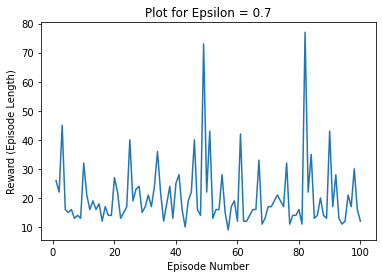

finding avg Returns...
Testing
Episode Number: #1, Episode Length 68
Episode Number: #2, Episode Length 9
Episode Number: #3, Episode Length 63
Episode Number: #4, Episode Length 69
Episode Number: #5, Episode Length 8
Episode Number: #6, Episode Length 22
Episode Number: #7, Episode Length 10
Episode Number: #8, Episode Length 18
Episode Number: #9, Episode Length 84
Episode Number: #10, Episode Length 11
Episode Number: #11, Episode Length 10
Episode Number: #12, Episode Length 26
Episode Number: #13, Episode Length 9
Episode Number: #14, Episode Length 18
Episode Number: #15, Episode Length 67
Episode Number: #16, Episode Length 48
Episode Number: #17, Episode Length 9
Episode Number: #18, Episode Length 8
Episode Number: #19, Episode Length 8
Episode Number: #20, Episode Length 8


Avg Return = 28.65
Training...
Episode Number: #1, Episode Length 19, epsilon 0.5
Episode Number: #2, Episode Length 20, epsilon 0.5
Episode Number: #3, Episode Length 24, epsilon 0.5
Episode Number: #4, Episode Length 18, epsilon 0.5
Episode Number: #5, Episode Length 14, epsilon 0.5
Episode Number: #6, Episode Length 63, epsilon 0.5
Episode Number: #7, Episode Length 25, epsilon 0.5
Episode Number: #8, Episode Length 88, epsilon 0.5
Episode Number: #9, Episode Length 27, epsilon 0.5
Episode Number: #10, Episode Length 24, epsilon 0.5
Episode Number: #11, Episode Length 14, epsilon 0.5
Episode Number: #12, Episode Length 14, epsilon 0.5
Episode Number: #13, Episode Length 12, epsilon 0.5
Episode Number: #14, Episode Length 18, epsilon 0.5
Episode Number: #15, Episode Length 21, epsilon 0.5
Episode Number: #16, Episode Length 9, epsilon 0.5
Episode Number: #17, Episode Length 19, epsilon 0.5
Episode Number: #18, Episode Length 11, epsilon 0.5
Episode Number: #19, Episode Length 32, eps

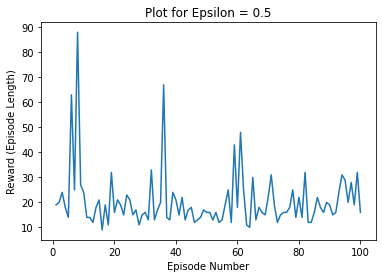

finding avg Returns...
Testing
Episode Number: #1, Episode Length 52
Episode Number: #2, Episode Length 41
Episode Number: #3, Episode Length 47
Episode Number: #4, Episode Length 24
Episode Number: #5, Episode Length 47
Episode Number: #6, Episode Length 56
Episode Number: #7, Episode Length 45
Episode Number: #8, Episode Length 52
Episode Number: #9, Episode Length 24
Episode Number: #10, Episode Length 29
Episode Number: #11, Episode Length 45
Episode Number: #12, Episode Length 37
Episode Number: #13, Episode Length 156


Episode Number: #14, Episode Length 33
Episode Number: #15, Episode Length 64
Episode Number: #16, Episode Length 51
Episode Number: #17, Episode Length 59
Episode Number: #18, Episode Length 48
Episode Number: #19, Episode Length 22
Episode Number: #20, Episode Length 33


Avg Return = 48.25
Training...
Episode Number: #1, Episode Length 30, epsilon 0.3
Episode Number: #2, Episode Length 57, epsilon 0.3
Episode Number: #3, Episode Length 22, epsilon 0.3
Episode Number: #4, Episode Length 13, epsilon 0.3
Episode Number: #5, Episode Length 28, epsilon 0.3
Episode Number: #6, Episode Length 12, epsilon 0.3
Episode Number: #7, Episode Length 10, epsilon 0.3
Episode Number: #8, Episode Length 35, epsilon 0.3
Episode Number: #9, Episode Length 11, epsilon 0.3
Episode Number: #10, Episode Length 26, epsilon 0.3
Episode Number: #11, Episode Length 13, epsilon 0.3
Episode Number: #12, Episode Length 39, epsilon 0.3
Episode Number: #13, Episode Length 35, epsilon 0.3
Episode Number: #14, Episode Length 18, epsilon 0.3
Episode Number: #15, Episode Length 24, epsilon 0.3
Episode Number: #16, Episode Length 58, epsilon 0.3
Episode Number: #17, Episode Length 34, epsilon 0.3
Episode Number: #18, Episode Length 8, epsilon 0.3
Episode Number: #19, Episode Length 17, eps

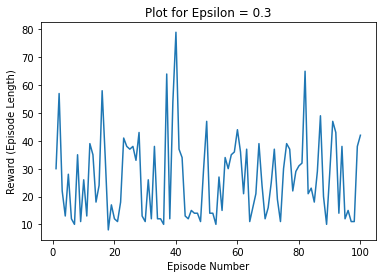

finding avg Returns...
Testing
Episode Number: #1, Episode Length 14
Episode Number: #2, Episode Length 11
Episode Number: #3, Episode Length 15
Episode Number: #4, Episode Length 16
Episode Number: #5, Episode Length 15
Episode Number: #6, Episode Length 14
Episode Number: #7, Episode Length 11
Episode Number: #8, Episode Length 11
Episode Number: #9, Episode Length 18
Episode Number: #10, Episode Length 14
Episode Number: #11, Episode Length 14
Episode Number: #12, Episode Length 11
Episode Number: #13, Episode Length 15
Episode Number: #14, Episode Length 16
Episode Number: #15, Episode Length 15
Episode Number: #16, Episode Length 13
Episode Number: #17, Episode Length 16
Episode Number: #18, Episode Length 11
Episode Number: #19, Episode Length 13
Episode Number: #20, Episode Length 14


Avg Return = 13.85
Training...
Episode Number: #1, Episode Length 116, epsilon 0.2


Episode Number: #2, Episode Length 42, epsilon 0.2
Episode Number: #3, Episode Length 29, epsilon 0.2
Episode Number: #4, Episode Length 14, epsilon 0.2
Episode Number: #5, Episode Length 47, epsilon 0.2
Episode Number: #6, Episode Length 67, epsilon 0.2
Episode Number: #7, Episode Length 75, epsilon 0.2
Episode Number: #8, Episode Length 105, epsilon 0.2


Episode Number: #9, Episode Length 42, epsilon 0.2
Episode Number: #10, Episode Length 59, epsilon 0.2
Episode Number: #11, Episode Length 34, epsilon 0.2
Episode Number: #12, Episode Length 78, epsilon 0.2
Episode Number: #13, Episode Length 123, epsilon 0.2


Episode Number: #14, Episode Length 49, epsilon 0.2
Episode Number: #15, Episode Length 78, epsilon 0.2
Episode Number: #16, Episode Length 79, epsilon 0.2
Episode Number: #17, Episode Length 99, epsilon 0.2
Episode Number: #18, Episode Length 74, epsilon 0.2
Episode Number: #19, Episode Length 86, epsilon 0.2
Episode Number: #20, Episode Length 31, epsilon 0.2
Episode Number: #21, Episode Length 68, epsilon 0.2
Episode Number: #22, Episode Length 64, epsilon 0.2
Episode Number: #23, Episode Length 77, epsilon 0.2
Episode Number: #24, Episode Length 14, epsilon 0.2
Episode Number: #25, Episode Length 150, epsilon 0.2


Episode Number: #26, Episode Length 46, epsilon 0.2
Episode Number: #27, Episode Length 43, epsilon 0.2
Episode Number: #28, Episode Length 59, epsilon 0.2
Episode Number: #29, Episode Length 39, epsilon 0.2
Episode Number: #30, Episode Length 12, epsilon 0.2
Episode Number: #31, Episode Length 32, epsilon 0.2
Episode Number: #32, Episode Length 87, epsilon 0.2
Episode Number: #33, Episode Length 31, epsilon 0.2
Episode Number: #34, Episode Length 105, epsilon 0.2


Episode Number: #35, Episode Length 67, epsilon 0.2
Episode Number: #36, Episode Length 46, epsilon 0.2
Episode Number: #37, Episode Length 60, epsilon 0.2
Episode Number: #38, Episode Length 62, epsilon 0.2
Episode Number: #39, Episode Length 51, epsilon 0.2
Episode Number: #40, Episode Length 32, epsilon 0.2
Episode Number: #41, Episode Length 102, epsilon 0.2


Episode Number: #42, Episode Length 24, epsilon 0.2
Episode Number: #43, Episode Length 22, epsilon 0.2
Episode Number: #44, Episode Length 40, epsilon 0.2
Episode Number: #45, Episode Length 36, epsilon 0.2
Episode Number: #46, Episode Length 25, epsilon 0.2
Episode Number: #47, Episode Length 98, epsilon 0.2
Episode Number: #48, Episode Length 28, epsilon 0.2
Episode Number: #49, Episode Length 42, epsilon 0.2
Episode Number: #50, Episode Length 87, epsilon 0.2
Episode Number: #51, Episode Length 67, epsilon 0.2
Episode Number: #52, Episode Length 27, epsilon 0.2
Episode Number: #53, Episode Length 42, epsilon 0.2
Episode Number: #54, Episode Length 58, epsilon 0.2
Episode Number: #55, Episode Length 58, epsilon 0.2
Episode Number: #56, Episode Length 122, epsilon 0.2


Episode Number: #57, Episode Length 13, epsilon 0.2
Episode Number: #58, Episode Length 30, epsilon 0.2
Episode Number: #59, Episode Length 43, epsilon 0.2
Episode Number: #60, Episode Length 58, epsilon 0.2
Episode Number: #61, Episode Length 30, epsilon 0.2
Episode Number: #62, Episode Length 98, epsilon 0.2
Episode Number: #63, Episode Length 13, epsilon 0.2
Episode Number: #64, Episode Length 40, epsilon 0.2
Episode Number: #65, Episode Length 116, epsilon 0.2


Episode Number: #66, Episode Length 122, epsilon 0.2


Episode Number: #67, Episode Length 103, epsilon 0.2


Episode Number: #68, Episode Length 67, epsilon 0.2
Episode Number: #69, Episode Length 117, epsilon 0.2


Episode Number: #70, Episode Length 46, epsilon 0.2
Episode Number: #71, Episode Length 59, epsilon 0.2
Episode Number: #72, Episode Length 58, epsilon 0.2
Episode Number: #73, Episode Length 38, epsilon 0.2
Episode Number: #74, Episode Length 39, epsilon 0.2
Episode Number: #75, Episode Length 23, epsilon 0.2
Episode Number: #76, Episode Length 50, epsilon 0.2
Episode Number: #77, Episode Length 70, epsilon 0.2
Episode Number: #78, Episode Length 61, epsilon 0.2
Episode Number: #79, Episode Length 53, epsilon 0.2
Episode Number: #80, Episode Length 28, epsilon 0.2
Episode Number: #81, Episode Length 66, epsilon 0.2
Episode Number: #82, Episode Length 47, epsilon 0.2
Episode Number: #83, Episode Length 12, epsilon 0.2
Episode Number: #84, Episode Length 52, epsilon 0.2
Episode Number: #85, Episode Length 65, epsilon 0.2
Episode Number: #86, Episode Length 46, epsilon 0.2
Episode Number: #87, Episode Length 43, epsilon 0.2
Episode Number: #88, Episode Length 13, epsilon 0.2
Episode Numb

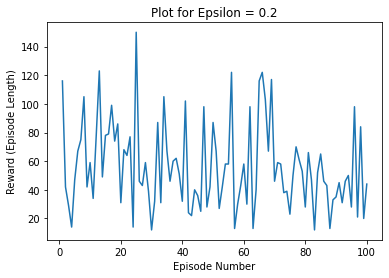

finding avg Returns...
Testing
Episode Number: #1, Episode Length 13
Episode Number: #2, Episode Length 11
Episode Number: #3, Episode Length 13
Episode Number: #4, Episode Length 9
Episode Number: #5, Episode Length 11
Episode Number: #6, Episode Length 14
Episode Number: #7, Episode Length 12
Episode Number: #8, Episode Length 10
Episode Number: #9, Episode Length 13
Episode Number: #10, Episode Length 19
Episode Number: #11, Episode Length 15
Episode Number: #12, Episode Length 11
Episode Number: #13, Episode Length 13
Episode Number: #14, Episode Length 17
Episode Number: #15, Episode Length 11
Episode Number: #16, Episode Length 15
Episode Number: #17, Episode Length 22
Episode Number: #18, Episode Length 10
Episode Number: #19, Episode Length 9
Episode Number: #20, Episode Length 13


Avg Return = 13.05
Training...
Episode Number: #1, Episode Length 9, epsilon 0.1
Episode Number: #2, Episode Length 15, epsilon 0.1
Episode Number: #3, Episode Length 15, epsilon 0.1
Episode Number: #4, Episode Length 16, epsilon 0.1
Episode Number: #5, Episode Length 11, epsilon 0.1
Episode Number: #6, Episode Length 12, epsilon 0.1
Episode Number: #7, Episode Length 9, epsilon 0.1
Episode Number: #8, Episode Length 21, epsilon 0.1
Episode Number: #9, Episode Length 16, epsilon 0.1
Episode Number: #10, Episode Length 15, epsilon 0.1
Episode Number: #11, Episode Length 14, epsilon 0.1
Episode Number: #12, Episode Length 14, epsilon 0.1
Episode Number: #13, Episode Length 11, epsilon 0.1
Episode Number: #14, Episode Length 10, epsilon 0.1
Episode Number: #15, Episode Length 11, epsilon 0.1
Episode Number: #16, Episode Length 14, epsilon 0.1
Episode Number: #17, Episode Length 11, epsilon 0.1
Episode Number: #18, Episode Length 12, epsilon 0.1
Episode Number: #19, Episode Length 12, epsi

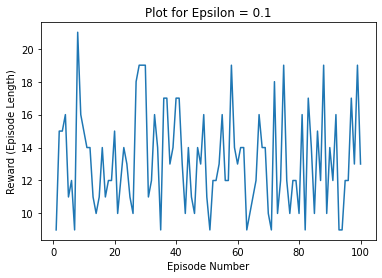

finding avg Returns...
Testing
Episode Number: #1, Episode Length 58
Episode Number: #2, Episode Length 42
Episode Number: #3, Episode Length 72
Episode Number: #4, Episode Length 200


Episode Number: #5, Episode Length 47
Episode Number: #6, Episode Length 60
Episode Number: #7, Episode Length 48
Episode Number: #8, Episode Length 200


Episode Number: #9, Episode Length 39
Episode Number: #10, Episode Length 31
Episode Number: #11, Episode Length 52
Episode Number: #12, Episode Length 27
Episode Number: #13, Episode Length 78
Episode Number: #14, Episode Length 65
Episode Number: #15, Episode Length 57
Episode Number: #16, Episode Length 52
Episode Number: #17, Episode Length 52
Episode Number: #18, Episode Length 34
Episode Number: #19, Episode Length 65
Episode Number: #20, Episode Length 49


Avg Return = 66.4


In [ ]:
for epsilon in epsilons:
    feat_vector, w0, w1, episode_lengths = qLearning(env, alpha = alpha, epsilon = epsilon, num_episodes = num_episodes, seed = seed, gamma = gamma, slice_size = slice_size, variance = variance, decay = decay, metric = metric,  ratios = ratios)
    fixed_epsilon_train_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)] = [feat_vector, w0, w1, episode_lengths]
    plt.title(f"Plot for Epsilon = {epsilon}")
    plt.plot(np.arange(1, 1 + len(episode_lengths)), episode_lengths)
    plt.xlabel("Episode Number")
    plt.ylabel("Reward (Episode Length)")
    plt.show()
    print("finding avg Returns...")                    
    fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)] = get_avg_return(env, feat_vector = feat_vector, w0 = w0, w1 = w1, num_episodes = test_episodes)
    print(f"Avg Return = {fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)]}")

In [ ]:
test_rewards_q2 = []
for epsilon in epsilons:
    test_rewards_q2.append(fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)])

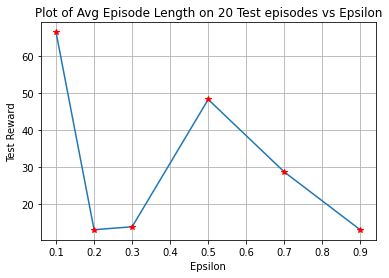

In [ ]:
plt.title(f'Plot of Avg Episode Length on {test_episodes} Test episodes vs Epsilon')
plt.plot(epsilons, test_rewards_q2)
plt.plot(epsilons, test_rewards_q2, '*', color = 'red')
plt.xlabel('Epsilon')
plt.ylabel('Test Reward')
plt.grid('on')
plt.show()

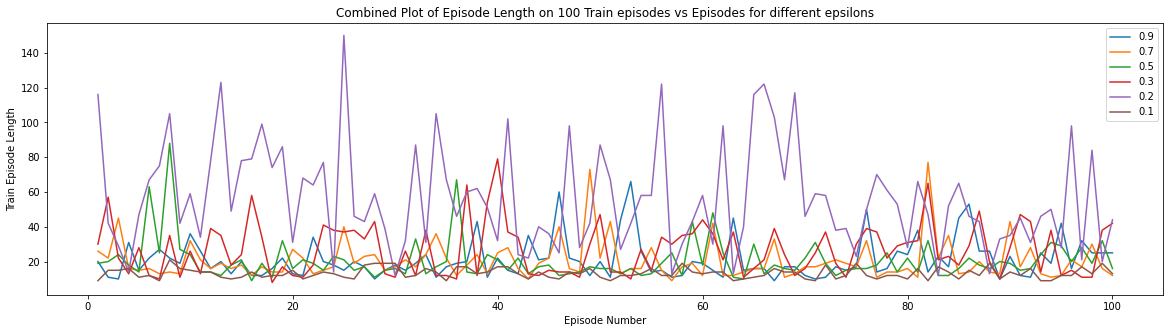

In [ ]:
plt.figure(figsize=(20,5))    
plt.title(f'Combined Plot of Episode Length on {num_episodes} Train episodes vs Episodes for different epsilons')
plt.xlabel('Episode Number')
plt.ylabel('Train Episode Length')
for epsilon in epsilons:
    plt.plot(np.arange(1, num_episodes + 1), fixed_epsilon_train_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)][-1],label = epsilon)
plt.legend()
plt.show()

# Observations for varying Epsilon over 100 train and 20 test episodes
- It was observed epsilon values of 0.1 and 0.5 performed the best on the testing episodes
- This can be attributed to more exploitation, as low $\epsilon$ corresponds to a policy closer to purely greedy policy ($\epsilon = 0$), with very low $\alpha = 0.0001$, controlling the noisy updates
- The test episodes for $\epsilon = 0.1$ gave average reward of 66.4 with max reward of 200 occuring 2 times in 20 episodes, **without a GPU or a neural network and on a small training batch**, accomplished using **non-linear radial basis approximation**
- The cartpole video renderings have been rendered in the cell of experiment whenver episode size exceeds 100, kindly scroll above and within the result display there are many videos rendered

Q3. How does the $\epsilon$-Greedy behaviour policy compare with the purely random behavior policy? Is the random behaviour policy a special case of $\epsilon$-Greedy? Comment. **(5 point)**

- The Q-learning Algorithm run with $\epsilon$-Greedy behaviour policy gave maximum average test episode length as **66.4** over 20 test runs for $\epsilon = 0.1$, wheareas, 
- The Q-learning Algorithm run with random behaviour policy gave maximum average test episode length as **93.75** over 20 test runs, and 50 train runs
- Hence, the random behavior policy performed better
- Random behavior policy is esentially when we don't exploit, i.e we have $\epsilon$ = 1, full probability for exploration
- This is expected to change as we increase number of train and test episodes, we expect epsilon greedy to perform better

Q4.  Implement Q-Learning using the $\epsilon$-Greedy behaviour policy where $\epsilon$ is reduced from 1 to 0.01 with increasing number of episodes. Plot the learning curve of the policy being learnt using episode vs. avg reward/episode. **(10 points)**

In [ ]:
alpha = 0.0001 #the best value we recognized while using random behaviour policy
epsilon = 1
num_episodes = 20
test_episodes = 20
seed = 1
gamma = 0.99
slice_size = 10
variance = 0.1
decay = 0 # for uniform decay
metric = 2
ratios = (1, 1, 1, 1)

Training...
Episode Number: #1, Episode Length 20, epsilon 1.0
Episode Number: #2, Episode Length 11, epsilon 0.9478947368421052
Episode Number: #3, Episode Length 19, epsilon 0.8957894736842105
Episode Number: #4, Episode Length 31, epsilon 0.8436842105263158
Episode Number: #5, Episode Length 23, epsilon 0.791578947368421
Episode Number: #6, Episode Length 27, epsilon 0.7394736842105263
Episode Number: #7, Episode Length 19, epsilon 0.6873684210526316
Episode Number: #8, Episode Length 13, epsilon 0.6352631578947369
Episode Number: #9, Episode Length 12, epsilon 0.5831578947368421
Episode Number: #10, Episode Length 10, epsilon 0.5310526315789473
Episode Number: #11, Episode Length 14, epsilon 0.47894736842105257
Episode Number: #12, Episode Length 16, epsilon 0.4268421052631579
Episode Number: #13, Episode Length 8, epsilon 0.37473684210526315
Episode Number: #14, Episode Length 12, epsilon 0.3226315789473684
Episode Number: #15, Episode Length 10, epsilon 0.2705263157894737
Episode

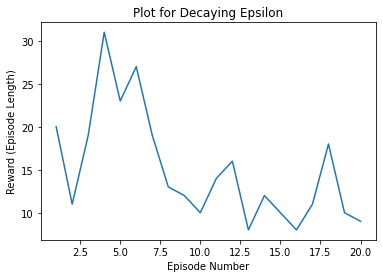

finding avg Returns...
Testing
Episode Number: #1, Episode Length 17
Episode Number: #2, Episode Length 17
Episode Number: #3, Episode Length 15
Episode Number: #4, Episode Length 21
Episode Number: #5, Episode Length 13
Episode Number: #6, Episode Length 15
Episode Number: #7, Episode Length 14
Episode Number: #8, Episode Length 15
Episode Number: #9, Episode Length 19
Episode Number: #10, Episode Length 18
Episode Number: #11, Episode Length 14
Episode Number: #12, Episode Length 17
Episode Number: #13, Episode Length 151


Episode Number: #14, Episode Length 19
Episode Number: #15, Episode Length 15
Episode Number: #16, Episode Length 17
Episode Number: #17, Episode Length 17
Episode Number: #18, Episode Length 18
Episode Number: #19, Episode Length 15
Episode Number: #20, Episode Length 19


Avg Return = 23.3


In [ ]:
feat_vector, w0, w1, episode_lengths = qLearning(env, alpha = alpha, epsilon = epsilon, num_episodes = num_episodes, seed = seed, gamma = gamma, slice_size = slice_size, variance = variance, decay = decay, metric = metric,  ratios = ratios)
fixed_epsilon_train_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)] = [feat_vector, w0, w1, episode_lengths]
plt.title(f"Plot for Decaying Epsilon")
plt.plot(np.arange(1, 1 + len(episode_lengths)), episode_lengths)
plt.xlabel("Episode Number")
plt.ylabel("Reward (Episode Length)")
plt.show()
print("finding avg Returns...")                    
fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)] = get_avg_return(env, feat_vector = feat_vector, w0 = w0, w1 = w1, num_episodes = test_episodes)
print(f"Avg Return = {fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)]}")

In [ ]:
alpha = 0.001 
epsilon = 1
num_episodes = 200
test_episodes = 20
seed = 1
gamma = 0.99
slice_size = 10
variance = 0.1
decay = 0 # for uniform decay
metric = 2
ratios = (1, 1, 1, 1)

Training...
Episode Number: #1, Episode Length 23, epsilon 1.0
Episode Number: #2, Episode Length 11, epsilon 0.9950251256281407
Episode Number: #3, Episode Length 26, epsilon 0.9900502512562814
Episode Number: #4, Episode Length 18, epsilon 0.9850753768844221
Episode Number: #5, Episode Length 12, epsilon 0.9801005025125629
Episode Number: #6, Episode Length 15, epsilon 0.9751256281407035
Episode Number: #7, Episode Length 24, epsilon 0.9701507537688442
Episode Number: #8, Episode Length 17, epsilon 0.9651758793969849
Episode Number: #9, Episode Length 19, epsilon 0.9602010050251256
Episode Number: #10, Episode Length 36, epsilon 0.9552261306532663
Episode Number: #11, Episode Length 11, epsilon 0.950251256281407
Episode Number: #12, Episode Length 18, epsilon 0.9452763819095478
Episode Number: #13, Episode Length 22, epsilon 0.9403015075376885
Episode Number: #14, Episode Length 22, epsilon 0.9353266331658292
Episode Number: #15, Episode Length 27, epsilon 0.9303517587939698
Episode 

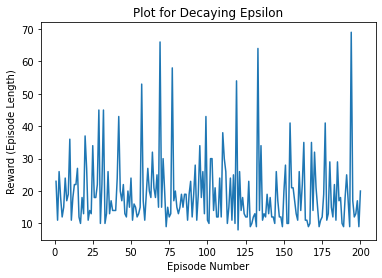

finding avg Returns...
Testing
Episode Number: #1, Episode Length 30
Episode Number: #2, Episode Length 32
Episode Number: #3, Episode Length 11
Episode Number: #4, Episode Length 22
Episode Number: #5, Episode Length 36
Episode Number: #6, Episode Length 11
Episode Number: #7, Episode Length 14
Episode Number: #8, Episode Length 13
Episode Number: #9, Episode Length 12
Episode Number: #10, Episode Length 9
Episode Number: #11, Episode Length 10
Episode Number: #12, Episode Length 9
Episode Number: #13, Episode Length 13
Episode Number: #14, Episode Length 11
Episode Number: #15, Episode Length 10
Episode Number: #16, Episode Length 12
Episode Number: #17, Episode Length 80
Episode Number: #18, Episode Length 11
Episode Number: #19, Episode Length 19
Episode Number: #20, Episode Length 16


Avg Return = 19.05


In [ ]:
feat_vector, w0, w1, episode_lengths = qLearning(env, alpha = alpha, epsilon = epsilon, num_episodes = num_episodes, seed = seed, gamma = gamma, slice_size = slice_size, variance = variance, decay = decay, metric = metric,  ratios = ratios)
fixed_epsilon_train_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)] = [feat_vector, w0, w1, episode_lengths]
plt.title(f"Plot for Decaying Epsilon")
plt.plot(np.arange(1, 1 + len(episode_lengths)), episode_lengths)
plt.xlabel("Episode Number")
plt.ylabel("Reward (Episode Length)")
plt.show()
print("finding avg Returns...")                    
fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)] = get_avg_return(env, feat_vector = feat_vector, w0 = w0, w1 = w1, num_episodes = test_episodes)
print(f"Avg Return = {fixed_epsilon_test_results[(alpha, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)]}")

## Below results are for a different run of the notebook which show, epsilon decay performed better than other epsilons, and epsilon = 3 performed better in $\epsilon$ greedy policy

In [ ]:
epsilons = [1, 0.9, 0.7, 0.5, 0.3, 0.2, 0.1]

In [ ]:
test_rewards_q4 = []
for epsilon in epsilons:
    if epsilon != 1:
        test_rewards_q4.append(fixed_epsilon_test_results[(0.0001, epsilon, 50, seed, gamma, slice_size, variance, -1, metric, ratios)])
    else:
        test_rewards_q4.append(fixed_epsilon_test_results[(0.001, epsilon, num_episodes, seed, gamma, slice_size, variance, decay, metric, ratios)])

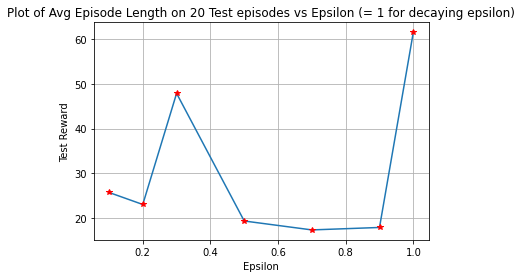

In [ ]:
plt.title(f'Plot of Avg Episode Length on {test_episodes} Test episodes vs Epsilon (= 1 for decaying epsilon)')
plt.plot(epsilons, test_rewards_q4)
plt.plot(epsilons, test_rewards_q4, '*', color = 'red')
plt.xlabel('Epsilon')
plt.ylabel('Test Reward')
plt.grid('on')
plt.show()

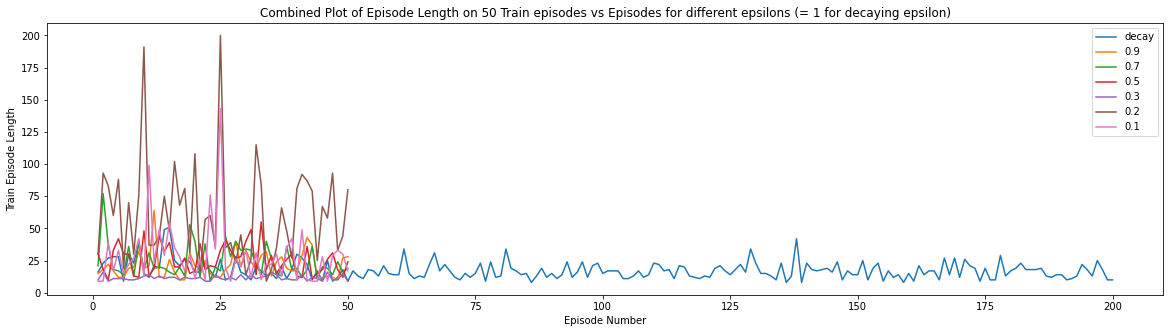

In [ ]:
plt.figure(figsize=(20,5))    
plt.title('Combined Plot of Episode Length on 50 Train episodes vs Episodes for different epsilons (= 1 for decaying epsilon)')
plt.xlabel('Episode Number')
plt.ylabel('Train Episode Length')
for epsilon in epsilons:
    if epsilon == 1:
        plt.plot(np.arange(1, 200 + 1), fixed_epsilon_train_results[(alpha, 1, num_episodes, seed, gamma, slice_size, variance, 0, metric, ratios)][-1],label = 'decay')
    else:
        plt.plot(np.arange(1, 50 + 1), fixed_epsilon_train_results[(0.0001, epsilon, 50, seed, gamma, slice_size, variance, -1, metric, ratios)][-1],label = epsilon)
plt.legend()
plt.show()

#  CarRacing-v0 environment from OpenAI Gym. 
https://gym.openai.com/envs/#box2d

Description:

Easiest continuous control task to learn from pixels, a top-down racing environment. 

Discreet control is reasonable in this environment as well, on/off discretisation is fine. 

State consists of 96x96 pixels. 

Reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles in track. 

For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points. Episode finishes when all tiles are visited.

# Template code for running CarRacing-v0

Dependencies 

In [1]:
!pip install gym==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
     |████████████████████████████████| 1.0 MB 49.3 MB/s 
  Created wheel for gym: filename=gym-0.15.3-py3-none-any.whl size=1644970 sha256=40b032cff72088b113f489f6c2b8567a2774b4ac497736a7302c85e486b6f5f1
  Stored in directory: /root/.cache/pip/wheels/55/16/6b/2250ca4f9f050a4d27d8bed287e57bbb3c33fc4066f557cc75
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.5.0
    Uninstalling cloudpickle-1.5.0:
      Successfully uninstalled cloudpickle-1.5.0
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probabil

In [2]:
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 448 kB 5.0 MB/s 


In [3]:
import gym
from gym import logger as gymlogger

gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [4]:
# install xvfb, a virtual X server
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,982 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 994 kB in 1s (1,268 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 123934 fil

In [5]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [6]:
from gym.wrappers import Monitor
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [7]:
env = wrap_env(gym.make("CarRacing-v0"))

In [8]:
# Test Environment and Show Videos
observation = env.reset()
while True:
    env.render()
    action = env.action_space.sample() 
    observation, reward, done, info = env.step(action)         
    if done: 
      break;
env.close()
show_video()

Track generation: 1050..1321 -> 271-tiles track


# Question 1
Q1. Consider $Q_0$(s, a) = 0 $\forall$ (s,a),  $\epsilon= 0.1 $ and $\alpha$ = 0.01 and implement SARSA and Expected SARSA. Plot the graphs for:  episode vs. max-time step and episode vs. average-reward in each case. State your observations. Render 3 videos for the initial, mid and final stages of the learning process for both the methods. **(20 points).**

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import layers, models

# Analyzing the State Space

Track generation: 1068..1340 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1057..1325 -> 268-tiles track


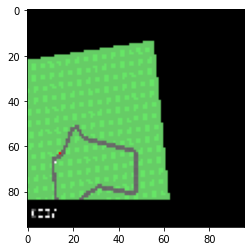

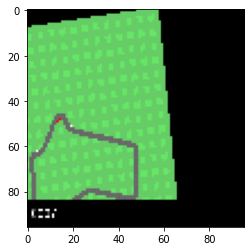

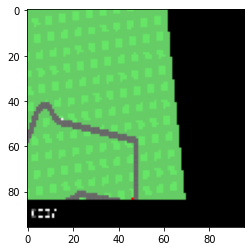

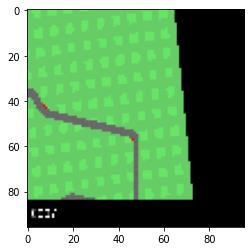

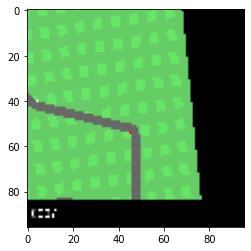

In [10]:
env = wrap_env(gym.make("CarRacing-v0"))
o = env.reset()
for _ in range(5):
    o, r, d, i = env.step([0, 0, 0])
    plt.imshow(o)
    plt.show()    

# Inferences : 
- The images rendered above show, the initial frames being a camera approaching a track from above, which is useless for any algorithm, so I will first stabilize the camera view , by running some dummy no-change actions i.e. **no-steer**, **no-gas**, **no-brake**

- Also it can be seen the bottom 15 rows, tell the statistics(reward, speed, gyroscope, etc.) about the car, which are for the human reader, so those rows can be removed as well

- The intensity values of the road, grass and car differ significantly, hinting a grayscale image may be sufficient to represent the statespace

Track generation: 876..1106 -> 230-tiles track


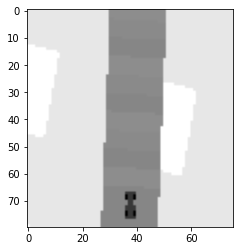

In [24]:
env = wrap_env(gym.make("CarRacing-v0"))
o = env.reset()
#stabilizing the camera view, which can be seen in any of dummy video's start
for _ in range(50):
    o, reward, done, info = env.step([0, 0, 0])    

# converting image to grayscale
o = rgb2gray(o)

# removing last 15 rows of data, corresponding to various display meters for humans
o = o[:-16, 10:-10]

# # removing redundant columns from left and right side
# o = o[:, 10:-10]

plt.imshow(o, cmap = 'gray')
plt.show()

In [26]:
print(f'shape of image reduced from 96,96,3 to {o.shape}')

shape of image reduced from 96,96,3 to (80, 76)


In [12]:
class car_racing():
    def __init__(self,gamma = 0.9, alpha = 0.01, epsilon = 0.1, train_episodes = 20, test_episodes = 3):
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.train_episodes = train_episodes
        self.test_episodes = test_episodes # not used, redundant
        self.env = wrap_env(gym.make("CarRacing-v0"))
        self.model = self.init_model()
        #discrete action space values inspired by car-racing version 1 in documentation
        self.actions = dict({})
        discrete_action_mapper = 0
        for steer in [-1, 0, 1]:
            for gas in [0, 1]:
                for brake in [0, 1]:
                    self.actions[discrete_action_mapper] = [steer, gas, brake]
                    discrete_action_mapper += 1
        
    def warm_up(self):
        o = self.env.reset()
        for _ in range(50):
            o, r, d, i = self.env.step([0, 0, 0]) #no-op action       
    def pre_image(self, img):
        img = rgb2gray(img)
        img = img[:-16, 10:-10]
        img = img.reshape(1, img.shape[0], img.shape[1], 1)
        return img                 
    def sarsa(self):                                
        for _ in range(self.train_episodes):
            observation = self.env.reset() #initializing the state   
            observation = self.pre_image(observation)     
            self.warm_up()                 # to stabilize camera position
            action = None
            #Choose action from policy derived from q
            coin = np.random.uniform(0, 1)                          # for formulating stochasticity            
            if (coin <= (1 - self.epsilon)):                        # here we exploit
                action = np.argmax(self.model.predict(observation)[0])
            else:
                action = np.random.choice([i for i in range(12)])   # else we explore                                      

            while True:                
                observation_, reward, done, info = self.env.step(self.actions[action])
                observation_ = self.pre_image(observation_)
                action_ = None            
                #Choose action_ from policy derived from q
                coin = np.random.uniform(0, 1)                     # for formulating stochasticity             
                if (coin <= (1 - self.epsilon)):
                    action_ = np.argmax(self.model.predict(observation_)[0]) # here we exploit
                else:
                    action_ = np.random.choice([i for i in range(12)])   # else we explore                                                      
                # update q(s, a)
                true_val = reward 
                if not done:
                    true_val += self.gamma * self.model.predict(observation_)[0][action_] #subscript 0, as it returns batch                
                pred_val = self.model.predict(observation)
                modified_val = pred_val
                modified_val[0][action] = true_val
                self.model.fit(observation, modified_val)
                observation = observation_
                action = action_
                if done:
                    break    
    def expected_sarsa(self):                                
        for _ in range(self.train_episodes):
            observation = self.env.reset() #initializing the state   
            observation = self.pre_image(observation)     
            self.warm_up()                 # to stabilize camera position
            action = None
            #Choose action from policy derived from q
            coin = np.random.uniform(0, 1)                          # for formulating stochasticity            
            if (coin <= (1 - self.epsilon)):                        # here we exploit
                action = np.argmax(self.model.predict(observation)[0])
            else:
                action = np.random.choice([i for i in range(12)])   # else we explore                                      

            while True:                
                observation_, reward, done, info = self.env.step(self.actions[action])
                observation_ = self.pre_image(observation_)
                action_ = None            
                #Choose action_ from policy derived from q
                coin = np.random.uniform(0, 1)                     # for formulating stochasticity             
                if (coin <= (1 - self.epsilon)):
                    action_ = np.argmax(self.model.predict(observation_)[0]) # here we exploit
                else:
                    action_ = np.random.choice([i for i in range(12)])   # else we explore                                                      
                # update q(s, a)
                true_val = reward 
                if not done:
                    q_vals = self.model.predict(observation_)[0]
                    # modelling probability by q-value ratios
                    probs = q_vals/np.sum(q_vals)
                    true_val += self.gamma * np.sum(np.multiply(probs, q_vals))
                pred_val = self.model.predict(observation)
                modified_val = pred_val
                modified_val[0][action] = true_val
                self.model.fit(observation, modified_val)
                observation = observation_
                action = action_
                if done:
                    break    
    def init_model(self):
        # cnn referenced and modified from https://www.tensorflow.org/tutorials/images/cnn
        model = models.Sequential()
        model.add(layers.Conv2D(filters = 4, kernel_size = (5, 5), activation = 'relu', strides = 3, padding = "valid", input_shape = (80, 76, 1)))
        model.add(layers.MaxPooling2D(2, 2))        
        model.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', strides = 2, padding = "valid"))
        model.add(layers.MaxPooling2D(2, 2))   
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation = 'relu'))
        model.add(layers.Dense(12, activation = None))     # as total number of actions in discretized action space = 12
        optimizer = tf.keras.optimizers.Adam(lr=self.alpha)
        model.compile(loss = 'mean_squared_error', optimizer = optimizer)
        return model    

In [13]:
car = car_racing()

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
car.sarsa() #was re-run on 1 train episode, to run on multiple re-run the notebook for q2

Track generation: 987..1240 -> 253-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1076..1349 -> 273-tiles track
Track generation: 1144..1434 -> 290-tiles track
1/1 [==============================] - 0s 6ms/step - loss: 0.0023


In [22]:
observation = car.env.reset()
observation = car.pre_image(observation)
car.warm_up()
while True:
    car.env.render()
    action = np.argmax(car.model.predict(observation)[0])
    observation, reward, done, info = car.env.step(car.actions[action]) 
    observation = car.pre_image(observation)      
    if done: 
      break;
car.env.close()
show_video()

Track generation: 1080..1354 -> 274-tiles track
1/1 [==============================] - 0s 16ms/step


In [27]:
car2 = car_racing()

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
car2.expected_sarsa()

In [28]:
test_episodes = 50

In [ ]:
net_reward = 0
for _ in range(test_episodes):             
    observation = car.env.reset()
    observation = car.pre_image(observation)
    for i in range(50): #warm up test environment
        car.step([0, 0, 0])
    while True:
        car.render()
        action = np.argmax(car.model.predict(observation)[0])
        observation, reward, done, info = car.env.step(car.actions[action]) 
        net_reward += reward
        observation = car.pre_image(observation)      
        if done: 
            break;
    car.env.close()
    show_video()
print(f"avg reward = {net_reward/test_episodes}")    

Q2. Experiment with different $\alpha$ = [0.0001,0.001,0.01,0.1] and $\epsilon$ = [0.9, 0.5, 0.3, 0.1] combination for SARSA and Expected  SARSA agents. Discuss how changing $\alpha$ and $\epsilon$ affect the agent’s learning performance. Include graphs to help with your explanation. Also comment on best combination along with rendering its video. **(15 points).**

In [23]:
alphas = [0.0001, 0.001, 0.01, 0.1]
epsilons = [0.9, 0.5, 0.3, 0.1]

In [ ]:
for alpha in alphas:
    for epsilon in epsilons:
        car = car_racing(alpha=alpha, epsilon = epsilon)
        car.sarsa()
        car.expected_sarsa()

# Observations:
-  Alpha 0.0001 and epsilon around 0.3 to 0.1 is expected to perform the best, low epsilon as there is sufficient scope of exploitation, unlike cartpole
- Due to computation limitations this couldn't be run fully

Q3. Implement SARSA($\lambda$) with $\lambda = 0.5$ and the best combination of the $\alpha$ and $\epsilon$ values from the previous question Q2. Compare the performance of SARSA($\lambda$) with that of plain SARSA algorithm. **(10 points).**